# MRO

https://en.wikipedia.org/wiki/C3_linearization

Основной посыл:
- Родитель всгда идет раньше детей
- Левый родитель всегда идет раньше правого родителя

Пусть  `Type` -- класс, `parent_i` -- упорядоченное множество типов родителей (прямые родители) класса `Type`

Тогда линеаризация 
```
L(Type) = Type + MERGE(
    L(parent_1),  # линеаризация первого родителя
    L(parent_2),  # линеаризация второго родителя
    ...,
    L(parent_N),  # линеаризация последнего родителя
    [parent_1, parent_2, ..., parent_N]  # упорядоченный список самих родителей
)
```

где `MERGE` итеративная процедура, где на каждой итерации происходит следующее:

- последовательно (от первого к последнему) идет по спискам
- берет тип -- голову списка (первый элемент)
- проверяет, встречается ли этот тип где-то, кроме как на первом месте в других списках
- если тип встречается только в голове (или не встречается), то тип добавляется в итоговую линеаризацию и вычеркивается из всех списков внутри MERGE, переходим к следующей итерации
- если тип встречается НЕ В ГОЛОВЕ, то переходим к следующему списку, берем голову, ...

## Diamond пример

In [ ]:
     Base
Child      Right
      Bottom

In [83]:
class Base: pass
class Left(Base):
    pass
#     def overloaded_method(self):
#         super(Left, self).overloaded_method()
class Right(Base):
    pass
#     def overloaded_method(self):
#         super(Right, self).overloaded_method()
class Bottom(Left, Right): pass

In [84]:
Base.mro()

[__main__.Base, object]

In [80]:
Bottom.mro()

[__main__.Bottom, __main__.Left, __main__.Right, __main__.Base, object]

In [ ]:
L(type) = type + MERGE(*(L(p_i) for i), parents)

In [ ]:
L(object) = object

In [ ]:
L(Base) = Base + MERGE(
    L(object),  # parent linearization
    [object,], # parents
) = Base + MERGE(
    [object],
    [object],
) = Base + object = [Base, object]

In [ ]:
L(Left) = Left + MERGE(
    L(Base) = [Base, object],
    [Base],
) = [Left, Base, object]

L(Right) = [Right, Base, object]

In [ ]:
L(Bottom) = Bottom + MERGE(
    L(Left),
    L(Right),
    [Left, Right],
) = Bottom + MERGE(
    [Left, Base, object],
    [Right, Base, object],
    [Left, Right],
) = Bottom + Left + MERGE(
    [Base, object],
    [Right, Base, object],
    [Right]
) = Bottom + Left + Right + MERGE(
    [Base, object],
    [Base, object],
) = [Bottom, Left, Right, Base, object]

In [85]:
Bottom.mro()

[__main__.Bottom, __main__.Left, __main__.Right, __main__.Base, object]

## Более сложный пример

```
A         E             F
x        x  xx        x
 x       x   xxx    xx
 xx     xx     x  xxx
  xx   x       xxxx
  xx B          D               G
     x          x           xxx
     xxx       xx       xxxx
       xx     xx     xxx
        xx   xx  xxxxx
           C x xxx
```

In [104]:
class A: pass
class E: pass
class F: pass
class B(A, E): pass
class D(E, F): pass
class G: pass
class C(B, D, G): pass

In [105]:
C.mro()

[__main__.C,
 __main__.B,
 __main__.A,
 __main__.D,
 __main__.E,
 __main__.F,
 __main__.G,
 object]

Примерная логика:
- идем всегда наверх влево, затем вправо, до тех пор, пока какой-то родитель не станет зависеть от этого правого
- C -> B -> A
- дальеш должен был быть E, но E родитель D, который по определению должен идти перед
- A -> D
- идем вверх влево D -> E
- вправо E -> F (можем, мотому что от F никто, кроме D не наследуется, а D уже был
- F -> G

In [106]:
for clazz in C.mro():
    print(clazz.__name__, clazz.mro())

C [<class '__main__.C'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.D'>, <class '__main__.E'>, <class '__main__.F'>, <class '__main__.G'>, <class 'object'>]
B [<class '__main__.B'>, <class '__main__.A'>, <class '__main__.E'>, <class 'object'>]
A [<class '__main__.A'>, <class 'object'>]
D [<class '__main__.D'>, <class '__main__.E'>, <class '__main__.F'>, <class 'object'>]
E [<class '__main__.E'>, <class 'object'>]
F [<class '__main__.F'>, <class 'object'>]
G [<class '__main__.G'>, <class 'object'>]
object [<class 'object'>]


## Пример, когда MRO не вычислим

In [107]:
class Base: pass
class Left(Base): pass
class Right(Base): pass
class Middle(Left, Right): pass
class Bottom(Middle, Right, Left): pass

TypeError: Cannot create a consistent method resolution
order (MRO) for bases Left, Right

- Bottom явно наследуется от Right, Left. Это значит, что Right должен идти ДО Left
- В то же время, он наследуется от Middle, который наследуется от Left, Right.
  - это значит, что Right должен идти ПОСЛЕ Left
- противоречие

# Миксины

In [ ]:
class Foo(FullOrderMixin):
    def __eq__
    def __lt__

In [ ]:
class FullOrderMixin:
    def __ne__
    def __le__

In [ ]:
class Foo(Foo2, Foo3):
    pass

In [ ]:
self.logger()

In [90]:
import logging

In [95]:
class LoggingMixin:
    def logger(self):
        if not hasattr(self, '_logger'):
            self._logger = logging.getLogger(self.__class__.__name__)
        return self._logger

In [99]:
class Another:
    def logger(self):
        print('hahaha')

In [102]:
class Foo(Another, LoggingMixin):
    pass

In [103]:
Foo().logger().error('asdads')

hahaha


AttributeError: 'NoneType' object has no attribute 'error'

In [66]:
class Base:
    def __init__(self):
        print('Base::__init__')
class Child(Base):
    def __init__(self):
        print('Child::__init__')
        super().__init__()


class ChildSibling(Base):
    def __init__(self):
        print('ChildSibling::__init__')
        super().__init__()

    
        
class GrandChild(Child, ChildSibling):
    pass
        
        
GrandChild()



# GrandChild::__init__

Child::__init__
ChildSibling::__init__
Base::__init__


# Properties

- Хотим как-то защититься от записи
- Хотим иметь ленивый атрибут

In [2]:
class LoggingMixin:
    def logger(self):
        # create logger, if there is no one yet
        # return self._logger

class Foo(LoggingMixin):
    def do_smth_and_log(self):
        self.logger().info("starting")
        
        self.do_some_cool_stuff()
        
        self.logger().info("finished")
        
class BetterFoo(LoggingMixin):
    def do_smth_and_log(self):
        self.logger.info("starting") # logger is created only if necessary
        
        self.do_some_cool_stuff()
        
        self.logger.info("finished")

In [3]:
class ProtectedAgePerson:
    def __init__(self):
        self.age = 18

person.age  # 18
person.age = 20 # no-no

NameError: name 'person' is not defined

In [4]:
property()

property

In [67]:
class ClassWithProperty:
    
    @property
    def age(self):
        print('getter is called')
        return 18

In [68]:
ClassWithProperty().age

getter is called


18

In [69]:
ClassWithProperty().age = 20

AttributeError: can't set attribute

In [70]:
del ClassWithProperty().age

AttributeError: can't delete attribute

## property with setter

In [71]:
p = property()

In [72]:
type(p)

property

In [81]:
def property_desc(p):
    print(id(p), p.fget, p.fset, p.fdel)

In [82]:
property_desc(p)

140633887104192 None None None


In [75]:
def foo():
    pass

In [85]:
property_desc(
    p.getter(foo)
)

140633887102272 <function foo at 0x7fe7e09a2670> None None


In [86]:
p2 = p.getter(foo)

In [87]:
property_desc(
    p2.setter(foo) 
)

140633891784320 <function foo at 0x7fe7e09a2670> <function foo at 0x7fe7e09a2670> None


In [88]:
class ClassWithProperty:
    _age = 18
    
    @property
    def age(self):
        return self._age
    
#     age = property(age)
    
    @age.setter
    def age(self, new_age):
        if new_age < 0:
            raise ValueError('cannot set negatvie age!')
        self._age = new_age

In [89]:
obj = ClassWithProperty()

In [90]:
obj.age

18

In [91]:
obj.age = 30

In [23]:
obj.age

30

In [92]:
obj.age = -100

ValueError: cannot set negatvie age!

In [25]:
del obj.age

AttributeError: can't delete attribute

## property with deleter

In [93]:
class ClassWithProperty:
    _age = 18
    
    @property
    def age(self):
        return self._age
    
    @age.setter
    def age(self, new_age):
        if new_age < 0:
            raise ValueError('cannot set negatvie age!')
        self._age = new_age
    
    #set_age = age.setter(set_age)
    
        
    @age.deleter
    def age(self):
        print

## generic syntax

In [30]:
help(property)

Help on class property in module builtins:

class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None)
 |  
 |  Property attribute.
 |  
 |    fget
 |      function to be used for getting an attribute value
 |    fset
 |      function to be used for setting an attribute value
 |    fdel
 |      function to be used for del'ing an attribute
 |    doc
 |      docstring
 |  
 |  Typical use is to define a managed attribute x:
 |  
 |  class C(object):
 |      def getx(self): return self._x
 |      def setx(self, value): self._x = value
 |      def delx(self): del self._x
 |      x = property(getx, setx, delx, "I'm the 'x' property.")
 |  
 |  Decorators make defining new properties or modifying existing ones easy:
 |  
 |  class C(object):
 |      @property
 |      def x(self):
 |          "I am the 'x' property."
 |          return self._x
 |      @x.setter
 |      def x(self, value):
 |          self._x = value
 |      @x.deleter
 |      def x(self):
 |          del s

## property with setter only

In [96]:
class ClassWithProperty:

#     @property
    def age(self):
        pass
    
    age = property(age)
    
#     @age.setter
    def set_age(self, new_age):
        pass
    
    age = age.setter(set_age)
    
    

## А как написать деораторную логику без декоратора?

## Пример миксины с проперти

In [109]:
import logging
class LoggingMixin:
    
    @property
    def logger(self):
        if not hasattr(self, '_logger'):
            self._logger = logging.getLogger(self.__class__.__name__)
        return self._logger

In [110]:
class Child(LoggingMixin):
    def __init__(self):
        self.logger.warn('me created!')

In [111]:
Child()

/tmp/ipykernel_7105/2263178693.py:3: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn('me created!')
me created!


# Динамические атрибуты

instance.attr

In [ ]:
getattr(instance, 'attr')
- __getattribute__
- defualt implemenation (from object type)
   - instance::__dict__['attr']
   - class::__dict__['attr']
   - class::__getattr__(instance, 'attr')
   - 'AttributeError' exception

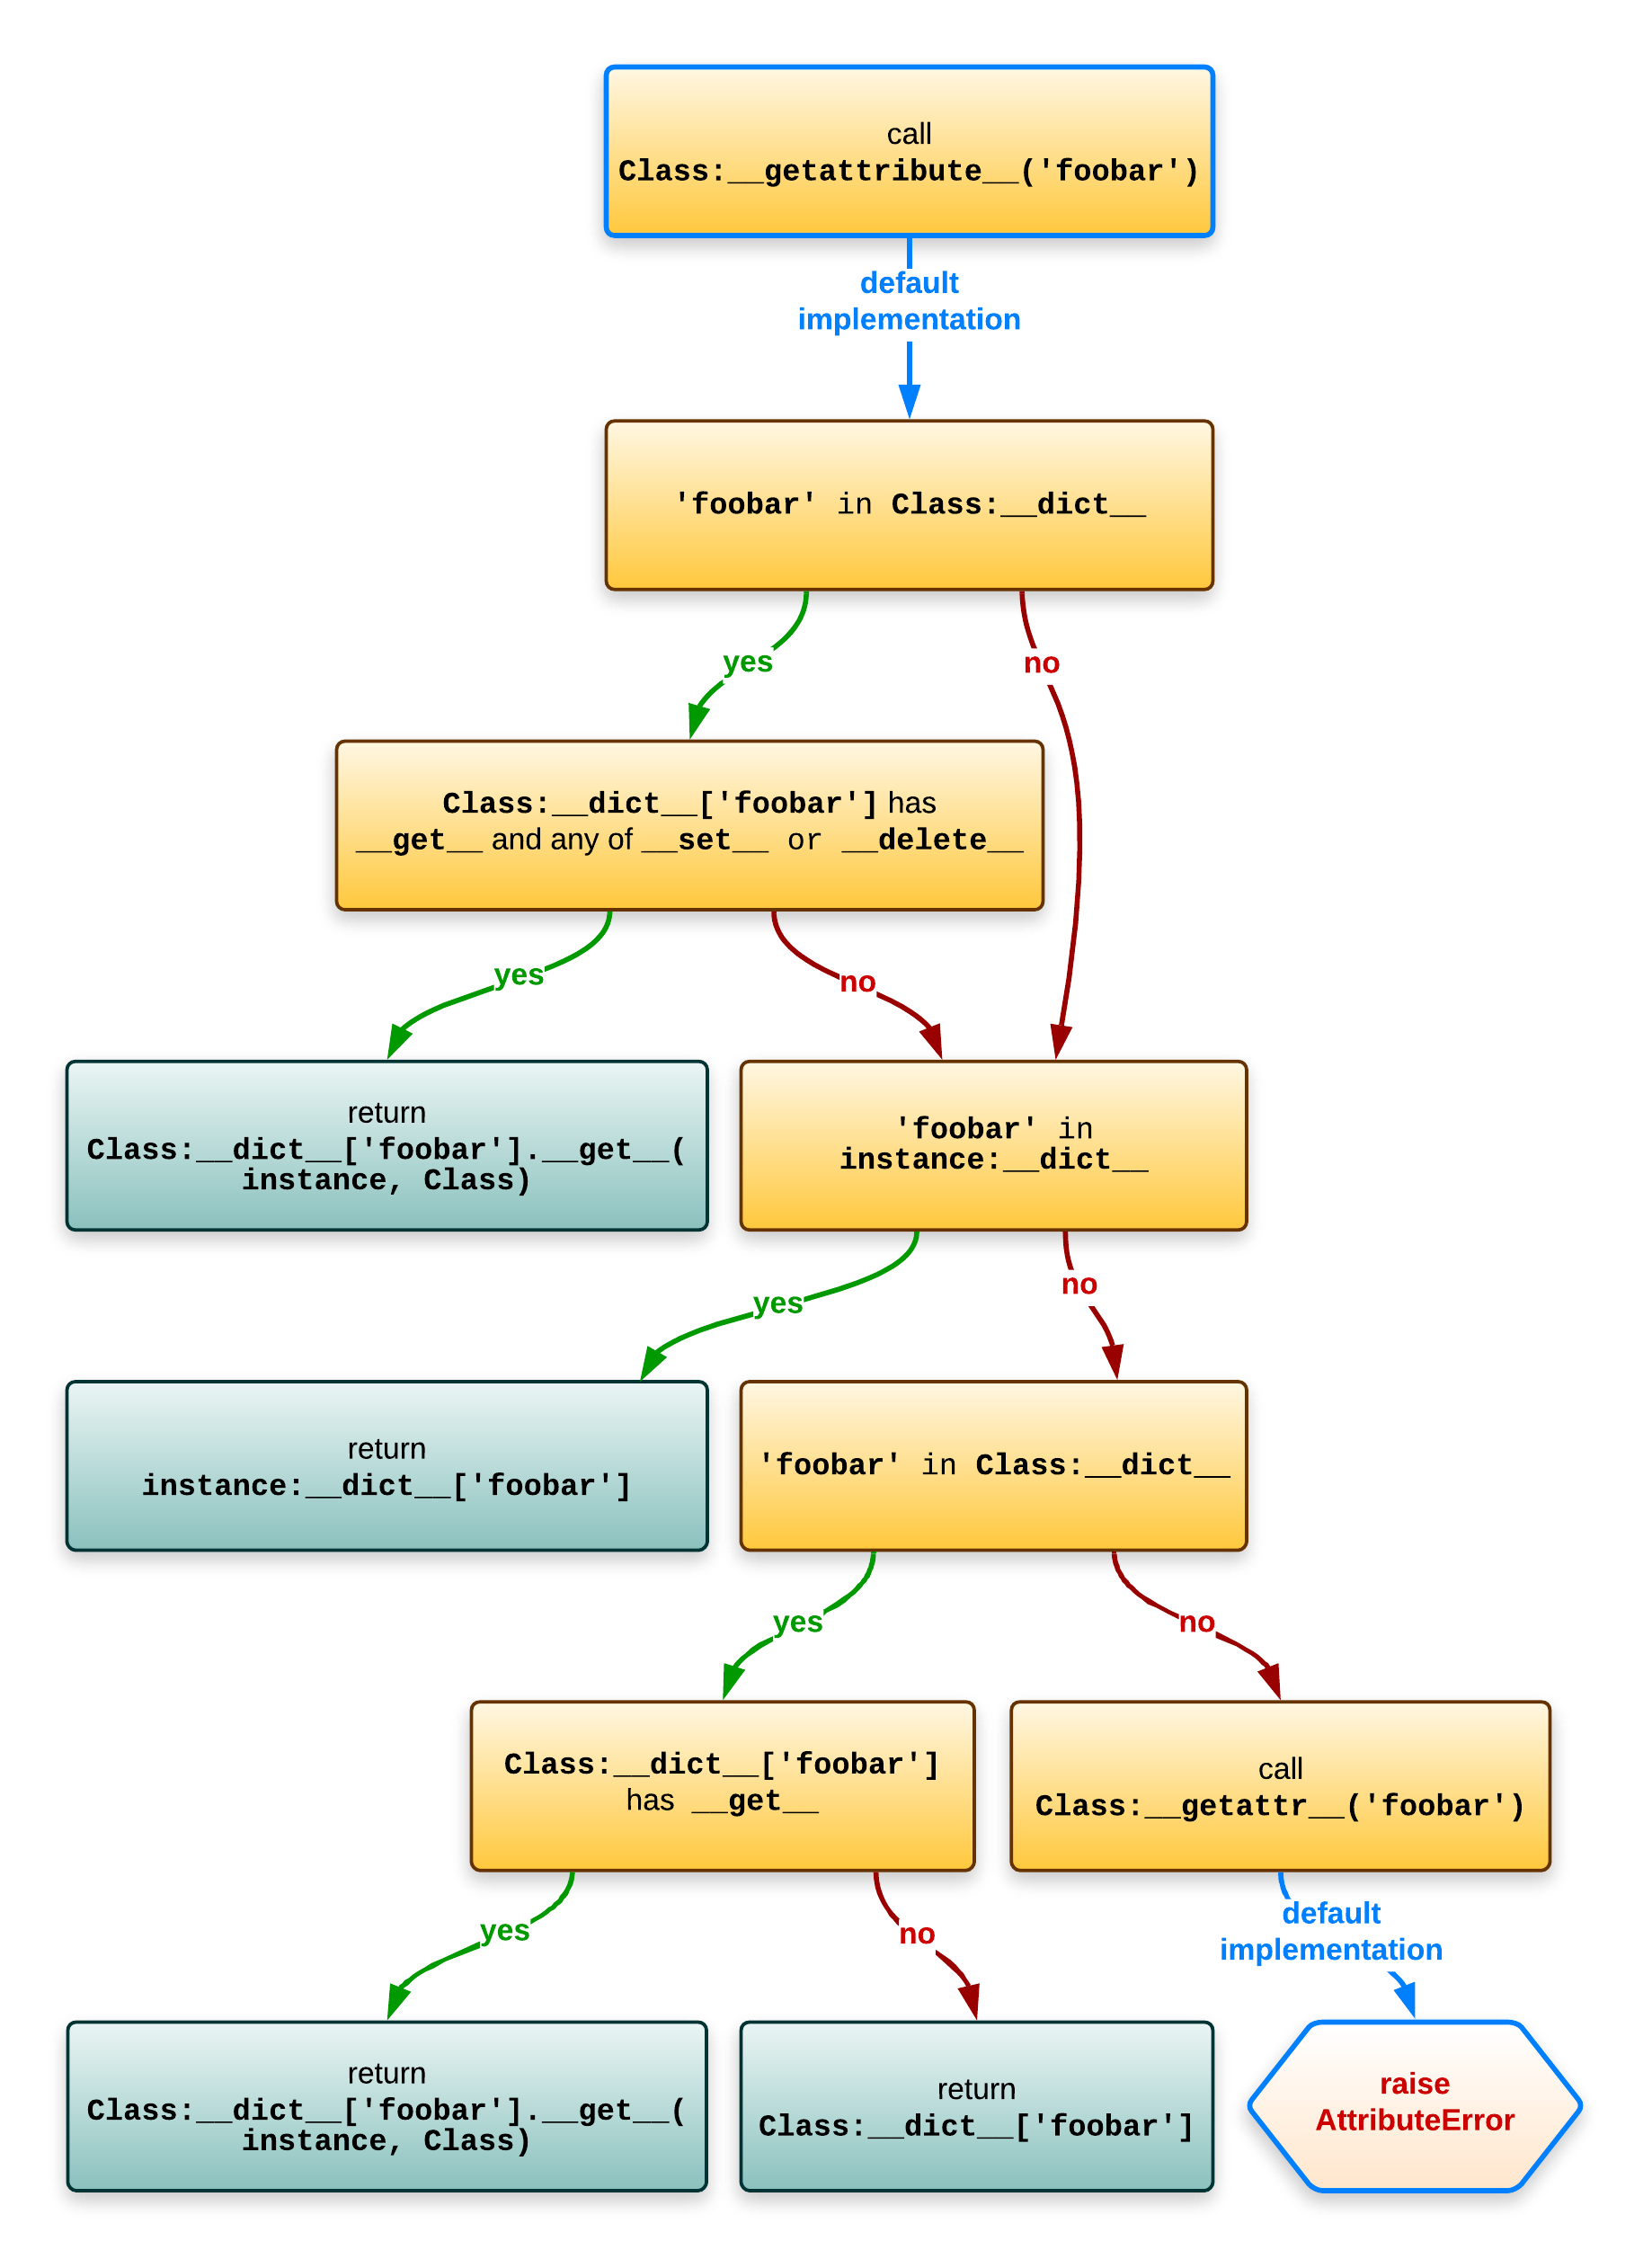

# Задача

- хотим работать со словарем как с обычный структурой, через
- хотим логировать доступ

In [112]:
class Foo:
    def __getattr__(self, key):
        print('__getattr__', key)

In [114]:
Foo().__dict__

{}

In [115]:
Foo.__dict__

mappingproxy({'__module__': '__main__',
              '__getattr__': <function __main__.Foo.__getattr__(self, key)>,
              '__dict__': <attribute '__dict__' of 'Foo' objects>,
              '__weakref__': <attribute '__weakref__' of 'Foo' objects>,
              '__doc__': None})

In [113]:
Foo.__init__

<slot wrapper '__init__' of 'object' objects>

In [33]:
Foo().__init__

<method-wrapper '__init__' of Foo object at 0x7fe7e0c63310>

In [118]:
Foo().blabla

__getattr__ blabla


getattr вызывается не всегда!

In [129]:
class Foo:
    def __getattribute__(self, key):
        print('__getattribute__', key)
#         return getattr(self, key)
        super().__getattribute__(key)

In [130]:
Foo().__init__

__getattribute__ __init__


In [ ]:
class Foo:
    
    def __getattribute__(self, key):
        print('__getattribute__', key)
        return self.

In [ ]:
class MyDict:
    def __getattr__(self, key): pass
    def __setattr__(self, key, value): pass
    def __delattr__(self, key): pass

In [131]:
class MyDictWrapper:
    def __init__(self, d):
        self.__dict__ = d

In [132]:
G = MyDictWrapper(globals())

In [134]:
def foo():
    global blabla
    blabla = 10

In [135]:
foo()

In [136]:
blabla

10

In [133]:
G.MyDictWrapper is MyDictWrapper

__main__.MyDictWrapper

# abc

In [ ]:
abstract base classes

- https://docs.python.org/3/library/abc.html
- https://docs.python.org/3/library/functions.html#issubclass

- коммуницирует интерфейс (API)
- заставляет наследников реализовать этот интерфейс

In [137]:
class BaseClass:
    def method(self):
        raise NotImplementedError()

class Child(BaseClass):
    pass

child = Child()

Child().method()

TypeError: method() missing 1 required positional argument: 'self'

## смотрим, как реализованы декораторы abstractmethod

In [144]:
from abc import ABC, abstractmethod, ABCMeta, abstractclassmethod

In [145]:
class Foo(metaclass=ABCMeta):
    @abstractmethod
    def foo(self):
        pass
    
    @abstractmethod
    @classmethod
    def boo(cls):
        pass
    
class Boo(Foo):
    def boo(self):
        pass

In [146]:
Foo.__abstractmethods__

frozenset({'boo', 'foo'})

In [147]:
Boo.__abstractmethods__

frozenset({'foo'})

In [54]:
class Foo2(Foo):
    foo = 2

In [57]:
class Foo2:
    __abstractmethods__ = frozenset(['haha', 'blabla'])

In [58]:
Foo2.__abstractmethods__

frozenset({'blabla', 'haha'})

In [41]:
Foo()

TypeError: Can't instantiate abstract class Foo with abstract method foo

In [150]:
class AbcBase(ABC):
    @abstractmethod
    def abc_method(self):
        pass

class Child(AbcBase):
    abc_method = 10

In [152]:
Child()

In [163]:
class VirtualChild():
    def abc_method(self):
        pass

In [164]:
AbcBase.register(VirtualChild)

__main__.VirtualChild

In [165]:
issubclass(VirtualChild, AbcBase)

True

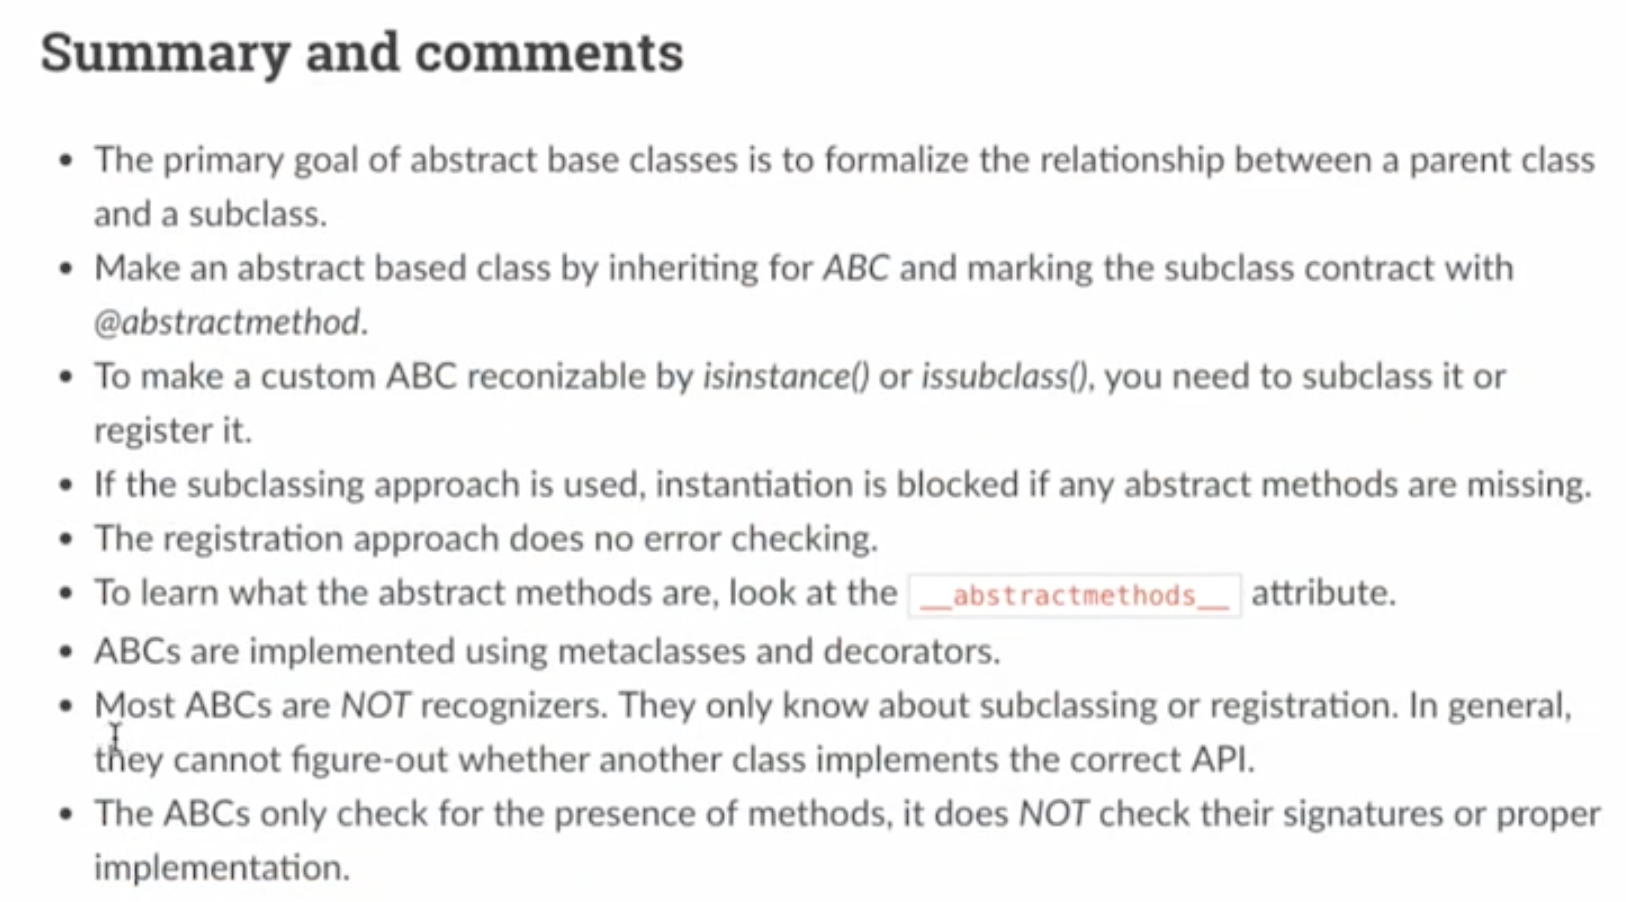

## Подходы к использованию
- pure abstract class
- mixins

In [166]:
class Mixin(ABC):
    
    @abstractmethod
    def foo(self):
        raise NotImplementedError()
    
    
    def multiply_foo_result_by_two(self):
        return self.foo() * 2

In [170]:
class ChildBase(Mixin):
    def foo(self):
        return 10
    
    def __init__(self):
        print(self.multiply_foo_result_by_two())

In [171]:
ChildBase()

20


In [172]:
from typing import Mapping

In [173]:
Mapping[int, str]

typing.Mapping[int, str]

In [174]:
from typing import Callable

In [175]:
isinstance(str, Callable)

True

In [176]:
class Foo:
    pass

In [177]:
isinstance(Foo, Callable)

True